Topic : IPL Win Probablity                                                                        
                                                                                                  
Name  : Bharat Rajendra Sonavane                                                                  
     
Guided By : Dipak Sir.

In [1]:
import numpy as np
import pandas as pd

In [2]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [3]:
match.shape

(756, 18)

In [4]:
delivery.shape

(179078, 21)

In [5]:
match.head(6)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
delivery.groupby(['match_id','inning']).sum()['total_runs']

C:\Users\Admin\AppData\Local\Temp\ipykernel_2580\973590912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery.groupby(['match_id','inning']).sum()['total_runs']


match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [8]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2580\2630719186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [9]:
total_score_df=total_score_df[total_score_df['inning'] == 1]

In [10]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [11]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:

teams=[
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujrat Titans',
    'Lucknow Super Giants'
]

# Remove The Old Teams NAME into new NAMES

In [15]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Gujrat Lions','Gujrat Titans')
match_df['team2']=match_df['team2'].str.replace('Gujrat Lions','Gujrat Titans')

match_df['team1']=match_df['team1'].str.replace('Pune Warriors','Lucknow Super Giants')
match_df['team2']=match_df['team2'].str.replace('Pune Warriors','Lucknow Super Giants')

In [16]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(686, 20)

In [18]:
match_df=match_df[match_df['dl_applied'] == 0]

In [19]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [20]:
delivery_df=match_df.merge(delivery,on='match_id')

In [21]:
delivery_df=delivery_df[delivery_df['inning'] == 2]

In [22]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160227,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
160228,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
160229,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
160230,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [23]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\Admin\AppData\Local\Temp\ipykernel_2580\3025607697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [24]:
delivery_df['runs_left']=delivery_df['total_runs_x'] - delivery_df['current_score']

In [25]:
delivery_df['balls_left']=120 - (delivery_df['over']*6 + delivery_df['ball'])

In [26]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,113
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,112
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,111
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,110
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160227,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,-2
160228,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,-3
160229,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,-4
160230,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,-5


In [27]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10 - wickets
delivery_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2580\1270959441.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,113,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,112,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,111,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,110,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,109,10


In [28]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,113,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,112,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,111,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,110,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,109,10


In [29]:
delivery_df['crr']=(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [30]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [31]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [32]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [33]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [34]:
final_df=final_df.sample(final_df.shape[0])

In [35]:
final_df.head(1)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
6474,Kolkata Knight Riders,Mumbai Indians,Kolkata,156,101,9,173,5.368421,9.267327,0


In [36]:
final_df.dropna(inplace=True)

In [37]:
final_df=final_df[final_df['balls_left'] != 0]

In [38]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=2020)

In [39]:
print("Shape Of X_train",X_train.shape)
print("Shape Of y_train",y_train.shape)
print("Shape Of X_test",X_test.shape)
print("Shape Of y_test",y_test.shape)


Shape Of X_train (38160, 9)
Shape Of y_train (38160,)
Shape Of X_test (38161, 9)
Shape Of y_test (38161,)


# Labeling The Data

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

# Fit The Algorithm

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [42]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [43]:
pipe.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [44]:
y_pred=pipe.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8058226985665994

In [46]:
pipe.predict_proba(X_test)[10]

array([0.99606074, 0.00393926])

In [47]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [48]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [49]:
temp_df,target=match_progression(delivery_df,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,90.6,9.4
136,2,1,0,92.9,7.1
142,3,16,0,85.9,14.1
148,4,11,0,80.5,19.5
155,5,5,0,80.8,19.2
162,6,10,1,85.8,14.2
168,7,7,1,91.4,8.6
174,8,13,0,86.4,13.6
180,9,10,0,82.3,17.7
187,10,10,0,77.2,22.8


# Plot The Model

Text(0.5, 1.0, 'Target-207')

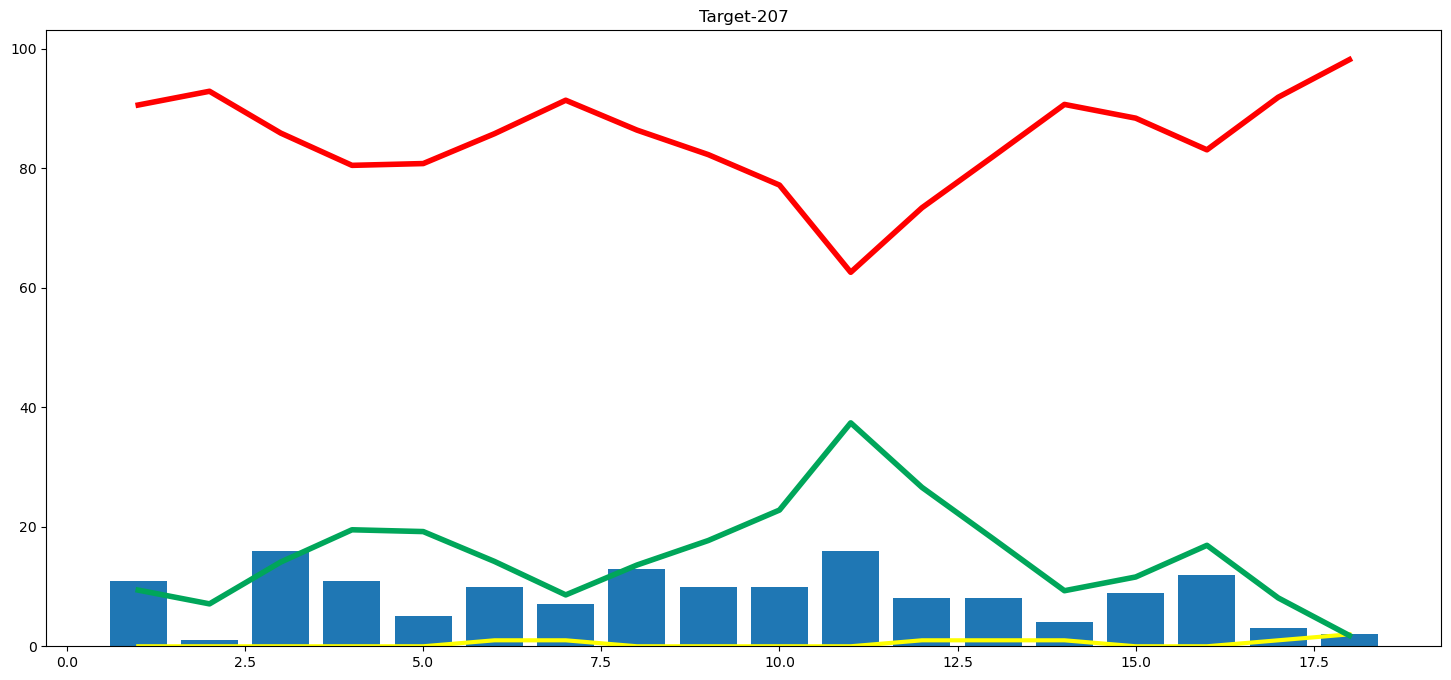

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

# Calulate The MSE and RMSE

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [52]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  0.1941773014334006
RMSE =  0.4406555360294485


# Using Random Foreest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn.preprocessing import LabelEncoder # OrdinalEncoder

In [55]:
 X_train = X_train[["batting_team","bowling_team","city","runs_left","balls_left","wickets","total_runs_x","crr","rrr"]] # We have take only 2 categorical variables

In [56]:
y_train

47045     0
78712     0
108560    1
42531     1
146331    1
         ..
63022     0
139892    1
81921     1
57377     1
112020    0
Name: result, Length: 38160, dtype: int64

In [57]:
le = LabelEncoder()

In [58]:
X_train["batting_team"] = le.fit_transform(X_train["batting_team"])
X_train["bowling_team"] = le.fit_transform(X_train["bowling_team"])
X_train["city"] = le.fit_transform(X_train["city"])
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
47045,9,6,21,135,74,8,184,6.391304,10.945946
78712,3,0,8,216,108,10,222,3.000000,12.000000
108560,6,4,7,4,2,7,156,7.728814,12.000000
42531,8,4,16,39,51,9,153,9.913043,4.588235
146331,5,10,19,72,24,7,189,7.312500,18.000000
...,...,...,...,...,...,...,...,...,...
63022,4,7,24,159,102,10,166,2.333333,9.352941
139892,0,9,24,22,14,6,131,6.169811,9.428571
81921,7,8,24,16,15,8,145,7.371429,6.400000
57377,7,1,14,58,57,9,136,7.428571,6.105263


In [59]:
X_train 

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
47045,9,6,21,135,74,8,184,6.391304,10.945946
78712,3,0,8,216,108,10,222,3.000000,12.000000
108560,6,4,7,4,2,7,156,7.728814,12.000000
42531,8,4,16,39,51,9,153,9.913043,4.588235
146331,5,10,19,72,24,7,189,7.312500,18.000000
...,...,...,...,...,...,...,...,...,...
63022,4,7,24,159,102,10,166,2.333333,9.352941
139892,0,9,24,22,14,6,131,6.169811,9.428571
81921,7,8,24,16,15,8,145,7.371429,6.400000
57377,7,1,14,58,57,9,136,7.428571,6.105263


In [60]:
X=X_train
y=y_train

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print('Shape of X_train= ',X_train.shape)
print('Shape of y_train= ',y_train.shape)
print('Shape of X_test= ',X_test.shape)
print('Shape of y_test= ',y_test.shape)

Shape of X_train=  (30528, 9)
Shape of y_train=  (30528,)
Shape of X_test=  (7632, 9)
Shape of y_test=  (7632,)


In [62]:
regressor=RandomForestClassifier(n_estimators=15,max_depth=20,criterion='gini',random_state=31)

In [63]:
regressor.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=15, random_state=31)

In [64]:
regressor.score(X_test,y_test)

0.9888626834381551

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold (n_splits=5,shuffle=True,random_state=42)


In [66]:
rf = RandomForestClassifier(random_state = 116)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
mae = mean_absolute_error(y_test, rf_pred)
score = rf.score(X_train, y_train) 
scores = cross_val_score(rf, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  rf_pred)

In [68]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [69]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [70]:
temp_df,target=match_progression(delivery_df,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,90.6,9.4
136,2,1,0,92.9,7.1
142,3,16,0,85.9,14.1
148,4,11,0,80.5,19.5
155,5,5,0,80.8,19.2
162,6,10,1,85.8,14.2
168,7,7,1,91.4,8.6
174,8,13,0,86.4,13.6
180,9,10,0,82.3,17.7
187,10,10,0,77.2,22.8


Text(0.5, 1.0, 'Target-207')

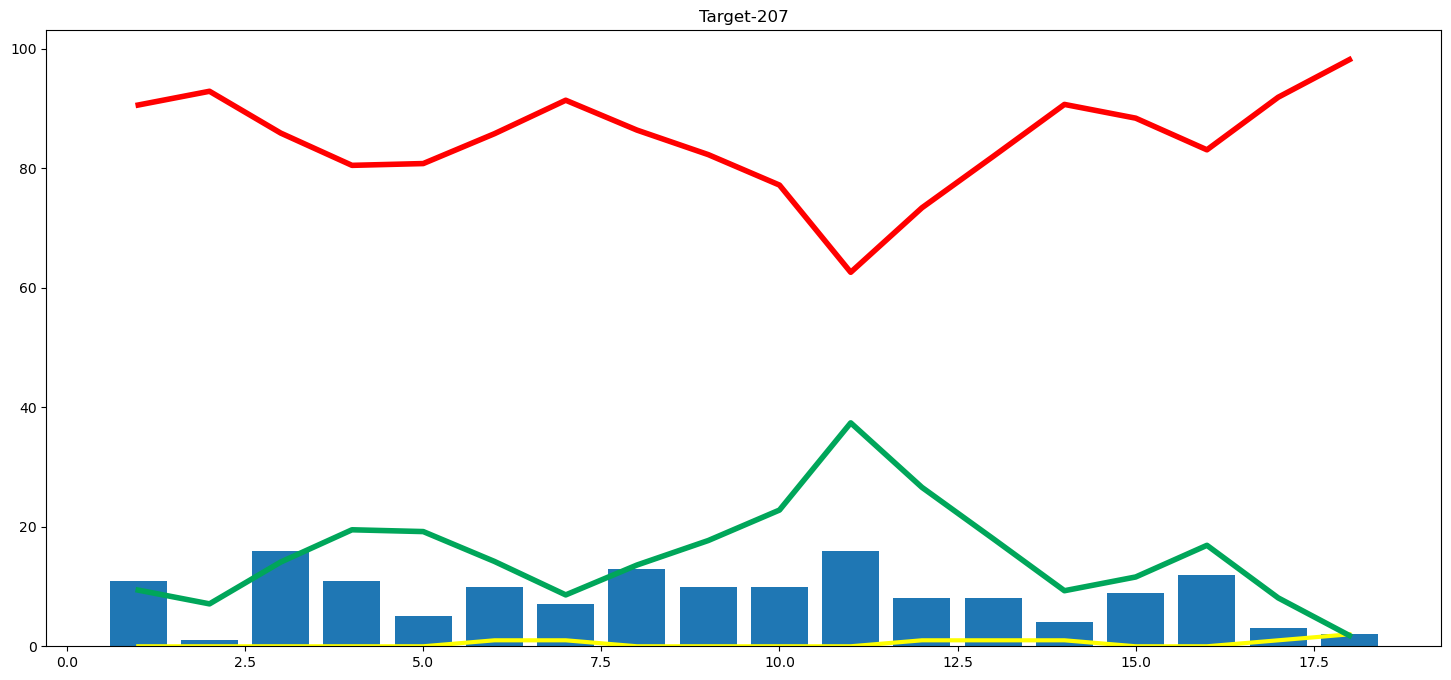

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

# K-Fold 

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold (n_splits=5,shuffle=True,random_state=42)

lr=RandomForestClassifier()

scores=cross_val_score (lr,X,y,cv=kfold, scoring='r2')

print('average R-squared score:', scores.mean())
print('individual R-squared scores:', scores)

average R-squared score: 0.9669399238659219
individual R-squared scores: [0.96954404 0.9638131  0.96694277 0.97111255 0.96328716]
